# Analyze Annotations

In [ ]:
import pylidc as pl
import pandas as pd
import matplotlib.pyplot as plt

## Separate by M

In [2]:
data_all    = []
data_m1     = []
data_m2     = []
data_m3     = []
data_m4     = []
data_m5     = []

annotations_all = pl.query(pl.Annotation).all()

for ann in annotations_all:
    mask = ann.boolean_mask()
    ann_info = [ann.diameter, ann.surface_area, ann.volume, mask.shape[0], mask.shape[1], mask.shape[2]]
    
    data_all.append(ann_info)
    if ann.malignancy == 1:
        data_m1.append(ann_info)
    elif ann.malignancy == 2:
        data_m2.append(ann_info)
    elif ann.malignancy == 3:
        data_m3.append(ann_info)
    elif ann.malignancy == 4:
        data_m4.append(ann_info)
    elif ann.malignancy == 5:
        data_m5.append(ann_info)

## Graph M lengths

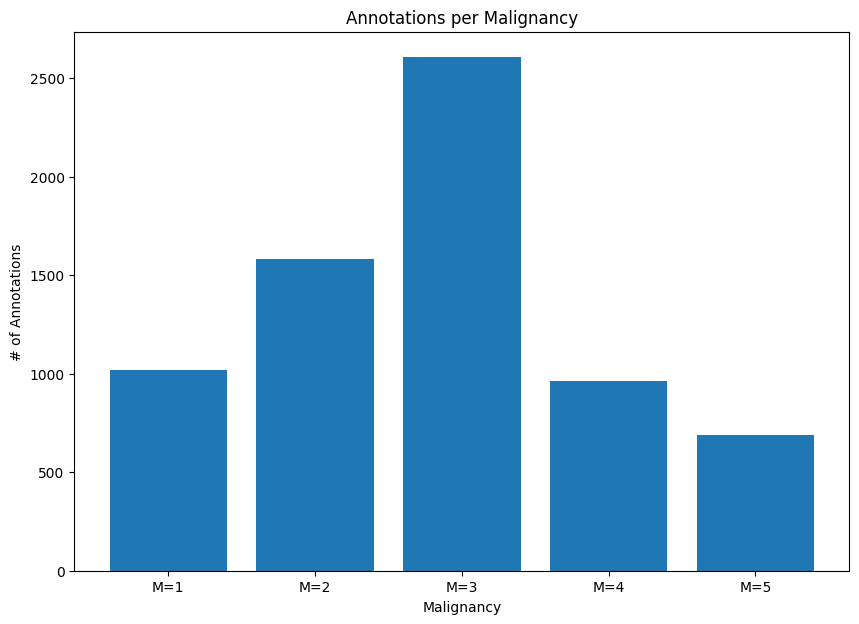

In [10]:
categories = ['M=1', 'M=2', 'M=3', 'M=4', 'M=5']
lengths = [len(data_m1), len(data_m2), len(data_m3), len(data_m4), len(data_m5)]

plt.figure(figsize=(10, 7))
plt.bar(categories, lengths)
plt.xlabel('Malignancy')
plt.ylabel('# of Annotations')
plt.title('Annotations per Malignancy')
plt.show()

## Plot M Characteristics

Negative: 1580
Positive: 962
Neg %: 0.6215578284815106


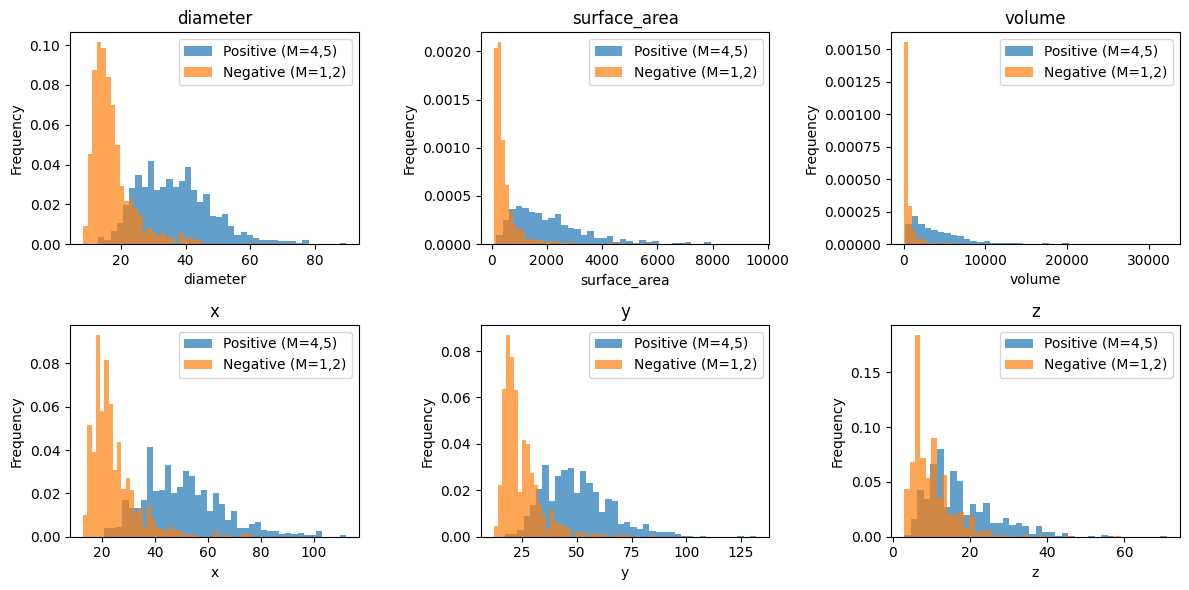

In [19]:
columns = ['diameter', 'surface_area', 'volume', 'x', 'y', 'z']
df_all  = pd.DataFrame(data_all, columns=columns)
df1     = pd.DataFrame(data_m1, columns=columns)
df2     = pd.DataFrame(data_m2, columns=columns)
df3     = pd.DataFrame(data_m3, columns=columns)
df4     = pd.DataFrame(data_m4, columns=columns)
df5     = pd.DataFrame(data_m5, columns=columns)

neg = df1 + df2
pos = df4 + df5

print(f"Negative: {len(neg)}")
print(f"Positive: {len(pos)}")
print(f"Neg %: {len(neg) / (len(neg) + len(pos))}")

plt.figure(figsize=(12, 6))
bins = 40
alpha = .7

for i, name in enumerate(columns):
    plt.subplot(2, 3, i+1)
    
    # df_all[name].plot(kind='hist', bins=bins, label='M=All', density=True)
    # df1[name].plot(kind='hist', bins=bins, alpha=alpha, label='M=1', density=True)
    # df2[name].plot(kind='hist', bins=bins, alpha=alpha, label='M=2', density=True)
    # df3[name].plot(kind='hist', bins=bins, alpha=alpha, label='M=3', density=True)
    # df4[name].plot(kind='hist', bins=bins, alpha=alpha, label='M=4', density=True)
    # df5[name].plot(kind='hist', bins=bins, alpha=alpha, label='M=5', density=True)
    
    pos[name].plot(kind='hist', bins=bins, alpha=alpha, label='Positive (M=4,5)', density=True)
    neg[name].plot(kind='hist', bins=bins, alpha=alpha, label='Negative (M=1,2)', density=True)
    
    plt.xlabel(name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(name)

plt.tight_layout()